In [1]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from numpy import pi
from scipy.special import jv
import math
from pathlib import Path
import matplotlib.pyplot as plt
figsize_hams=(3.9,3.9)
fontsize = 9
PlotParams(fontsize=fontsize)

### Get Ham from gradient

In [2]:
Ndiffs = 8
ymin = -0.35#jv(0, 3.8316) 
print(ymin)
tunnellings = np.linspace(-ymin, ymin, Ndiffs) # for linear
tunnellings = tunnellings[::-1]
#get A vals to get the right gradient
omega = 25
# print(gradients)
drive_style = "alternating"

xvals = ComputeAValsFromRequiredGradients(tunnellings)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
print(A_vals)

_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
                        2*pi/omega,
                        circle_boundary = 0
                        )

#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)

-0.35
[-41.58129882  41.58129882 -32.68924589  35.24080678 -27.3405605
  30.41640246 -22.81620936  26.05459543 -18.51474724]
Ham is real


In [3]:
alpha = [tunnellings[i+1]-tunnellings[i] for i in range(len(tunnellings)-1)][1]*4
print(alpha)
y_lh = -alpha/8
y_lh1 = alpha/8
y_lh2 = 3*alpha/8
print(y_lh, y_lh1, y_lh2)
print(tunnellings)
print(0.4*(1-4-0.5)/4)
print("J_1 = ", alpha*(1 - 5 + 0.5)/4)
print("J_2 = ", alpha*(2 - 5 + 0.5)/4)

0.40000000000000013
-0.05000000000000002 0.05000000000000002 0.15000000000000005
[-0.35 -0.25 -0.15 -0.05  0.05  0.15  0.25  0.35]
-0.35000000000000003
J_1 =  -0.3500000000000001
J_2 =  -0.2500000000000001


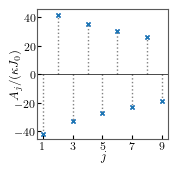

In [33]:

fig, ax = plt.subplots(figsize=(4.3/2.54,4.3/2.54))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
markerline, stemlines, baseline = ax.stem(range(N),
                                           A_vals, linefmt=':', markerfmt='x',
                                           basefmt=" "
)
stemlines.set_linewidth(1)
stemlines.set_color("0.5")

markerline.set_markersize(3)
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)


ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=1)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=1)  



#yaxis
ax.set_ylabel(r"$A_j/(\kappa J_0)$", rotation=90)
ax.yaxis.set_label_coords(-0.11,0.5)

#xaxis
ax.xaxis.set_label_coords(0.5,-0.08)
xticks = np.arange(0,N,2)
ax.set_xticks(np.arange(0,N,2))
ax.set_xlabel("$j$")
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks])

save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"a_vals_alternating.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()



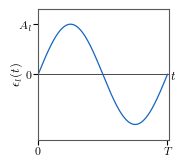

In [5]:
fig, ax = plt.subplots(figsize=(4.3/2.54,4.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
t = np.linspace(0,2*pi, 200)
ax.plot(t, np.sin(t), c="#1565C0", lw = 0.9)
# markerline, stemlines, baseline = ax.stem([pi/2],
#                                            [1], markerfmt="x", linefmt='-',
#                                            basefmt=" "
# )
# stemlines.set_linewidth(1)
# stemlines.set_color("0.5")
# plt.setp(markerline, 'color', plt.getp(stemlines,'color'))
# markerline.set_markersize(3)

# ax.quiver([pi/2, 3*pi/2], [0, 0], [0, 0], [1, -1], scale=1, scale_units = 'y', color="#1565C0")
ax.tick_params(axis='both', which='major', pad=1.2)
ax.set_ylabel(r"$\epsilon_l(t)$")
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_yticks([0,1])
ax.set_yticklabels([r"$0$", r"$A_l$"])
ax.set_ylim([-1.3, 1.3])
ax.set_xticks([0, 2*pi])
ax.set_xticklabels([r"$0$", r"$T$"])
ax.set_xlabel(r"$t$")
ax.xaxis.set_label_coords(1.03,0.53)
ax.set_xlim([0,2.03*pi])


save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"
fig.savefig(save_dir/"epsilon_l(t).pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

In [31]:
# # plot gradient
# # '#006F63', "#FFFFFF", '#F78320
# fig, ax = plt.subplots(figsize=(4.3/2.54,4.3/2.54))
# plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
# y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
# x = list(range(0, N-1))
# plt.plot(x, tunnellings, 
#         #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
#         label = "target",
#          c="#F78320")

# ax.plot(range(N-1), y, 'x', label = r"Floquet", c="#1565C0", ms = 3)
# ax.yaxis.set_label_coords(-0.11,0.5)
# ax.tick_params(axis='both', which='major', pad=0.4)
# ax.set_yticks([-0.4,0,0.4])
# ax.set_yticklabels([r"$-0.4$", r"$0$", r"$0.4$"])
# ax.set_xlim([-0.1,7.1])
# ax.set_xlabel(r"$l$")
# ax.xaxis.set_label_coords(0.5,-0.12)
# ax.set_ylabel(r"$\kappa_{l}/\kappa$", labelpad=-11)
# ax.set_ylim([-0.41, 0.41])
# xticks = np.arange(0,N-1,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])
# # plt.legend(loc="upper right", bbox_to_anchor=(1.1, 2))
# save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating.pdf"
# # fig.savefig(save_dir, format="pdf", bbox_inches="tight", pad_inches=0.01)
# plt.show()


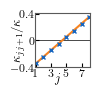

In [4]:
# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(1.8/2.54,1.8/2.54))

plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
x = list(range(0, N-1))
plt.plot(x, tunnellings, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target",
         c="#F78320")
ax.plot(range(N-1), y, 'x', label = r"Floquet", c="#1565C0", ms = 3)


ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=1)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=1)  

ax.yaxis.set_label_coords(-0.21,0.5)
ax.set_ylabel(r"$\kappa_{j j+1}/\kappa$")
ax.tick_params(axis='both', which='major', pad=0.4)
ax.set_yticks([-0.4,0,0.4])
ax.set_ylim([-0.41, 0.41])
ax.set_yticklabels([r"$-0.4$", r"$0$", r"$0.4$"])

ax.set_xlim([-0.1,7.1])
ax.set_xlabel(r"$j$")
ax.xaxis.set_label_coords(0.4,-0.1)
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks])
# plt.legend(loc="upper right", bbox_to_anchor=(1.1, 2))
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating_inset.pdf"
fig.savefig(save_dir, format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


In [22]:
fontsize = 9
PlotParams(fontsize=fontsize)

-0.3440989 0.349358


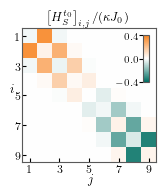

In [37]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_min, colourbar_max)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac,xfrac}')
xticks = list(np.arange(0,N,2))
ham_plot_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_paper"/"stroboscopic_ham.pdf"

figsize = (4.68,4.68)
data_cmap_lims = (-0.4, 0.4); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.6,0.4)



norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
cm_unit = 1/2.54
fig, ax = plt.subplots(constrained_layout=True, 
                       figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=1)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=1)  

im = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.set_title( r"$ \left[H_{S}^{t_0}\right]_{i,j} /(\kappa J_0)$")
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax.set_xlabel(r'$j$')
ax.set_ylabel(r"$i$", rotation=0, labelpad=2)#, fontsize=13.2)
ax.set_xticks(xticks)
ax.set_yticks(xticks)

ax.set_xticklabels([f"${i+1}$" for i in xticks])
ax.set_yticklabels([f"${i+1}$" for i in xticks])
ax.xaxis.set_label_coords(0.5,-0.08)

# divider = make_axes_locatable(ax)
# cax = divider.append_axes('upper right', size=f"7.5%", pad=0.03)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(0.9, 0.6, 1, 0.7),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
# axins.xaxis.set_ticks_position("bottom")
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
# cbar.ax.set_label_position('left')

# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=cax, ticks = colourbar_ticks)
cbar.ax.tick_params(labelsize=7, pad=0)
fig.savefig(ham_plot_dir, format="pdf", bbox_inches="tight",  pad_inches=0)

plt.show()


In [ ]:
print()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

im1 = ax1.imshow([[1, 2], [2, 3]])
axins1 = inset_axes(
    ax1,
    width="5%",  # width: 50% of parent_bbox width
    height="50%",  # height: 5%
    loc="upper right",
)
axins1.xaxis.set_ticks_position("bottom")
fig.colorbar(im1, cax=axins1, orientation="vertical", ticks=[1, 2, 3])

im = ax2.imshow([[1, 2], [2, 3]])
axins = inset_axes(
    ax2,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=(0.8, 0., 1, 1),
    bbox_transform=ax2.transAxes,
    borderpad=0,
)
fig.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.show()

In [ ]:
from numpy import exp
print(exp(-80))
print(exp(-80))
print(exp(-80))


In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*4/2.54, 4/2.54))
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)
# ax3.plot()

In [ ]:
cm_unit = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True, 
                            figsize=(15.6*cm_unit, 5.2*cm_unit))
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, constrained_layout=True, 
#                             figsize=(12*cm_unit, 4*cm_unit))
ax1.plot(range(N), A_vals, '.')
ax1.set_ylabel(r"$A_l$", rotation=0)
ax1.set_xticks(np.arange(0,N,2))
ax1.set_xlabel(r"$l$")
xticks = np.arange(0,N,2)
ax1.set_xticks(xticks)
ax1.set_xticklabels([str(i+1) for i in xticks])

colourbar_pad=0.07; colourbar_size_percentage=6.5, 
axes_tick_pos=xticks; axes_tick_labels=[str(i+1) for i in xticks];title_labelpad=10
data_cmap_lims = (-0.5, 0.5); colourbar_ticks = np.arange(-0.5,0.6,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
ax2.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax2.set_title( r'$ \left[H_{S}^{t_0}\right]_{i,j} /J$', pad=title_labelpad)
ax2.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax2.set_xlabel('$i$')
ax2.set_ylabel('$j$', rotation=0, labelpad=10)
ax2.set_xticks(axes_tick_pos)
ax2.set_yticks(axes_tick_pos)
ax2.set_xticklabels(axes_tick_labels)
ax2.set_yticklabels(axes_tick_labels)


ax2.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax2.set_title( r"$ \left[H_{S}^{t_0}\right]_{l,l'} /J$", pad=title_labelpad)
ax2.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
  labeltop=False)  
ax2.set_xlabel('$l$')
ax2.set_ylabel("$l'$", rotation=0, labelpad=10)
ax2.set_xticks(axes_tick_pos)
ax2.set_yticks(axes_tick_pos)
ax2.set_xticklabels(axes_tick_labels)
ax2.set_yticklabels(axes_tick_labels)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size=f"5%", pad=0.1)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = np.arange(-1,1.2,0.2))
       


# divider = make_axes_locatable(ax2)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = colourbar_ticks)
    

y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
ax3.plot(range(N-1), y, '.', label = r"Floquet")
ax3.plot(range(N-1), gradients, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target"
         )
ax3.set_xlabel(r"$l$")
ax3.set_ylabel(r"$J_{l, l+1}/J$", rotation=90, labelpad=2)
ax3.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(i+1) for i in xticks])
# ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save_dir = Path().absolute().parent.parent/"figures"/"black_hole_paper"/"tunnellings_alternating.pdf"
# fig.savefig(save_dir, format="pdf", bbox_inches="tight")

save_dir = Path().absolute().parent.parent/"figures"/"black_hole_paper"/f"floquet_sequence_accumulative_omega={omega}_small.pdf"
# fig.savefig(save_dir, format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
print(A_vals/(A_vals[3]))

In [ ]:
from numpy import tanh
j_list = np.linspace(-10, 10, 100)
jh = 5
d = 1
plt.plot(j_list, [tanh(d*(j-jh)) for j in j_list], 'x')
plt.show()